### Imports dataset

In [11]:
import sys
import pandas as pd

parent_dir = '/home/sei/tetrahedron_pair_ML'
sys.path.append(parent_dir)

n = 800000
tetrahedron_dataset = pd.read_csv('/home/sei/tetrahedron_pair_ML/data/processed/train/train_data.csv')

def has_t2_columns(df):
    """Check if the dataframe contains T2 columns"""
    return any(col.startswith('T2_') for col in df.columns)

### Dataset Structure:

In [12]:
tetrahedron_dataset.head()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
0,0.732219,0.262858,0.364984,0.840694,0.721354,0.960475,0.938143,0.648961,0.694748,0.602304,...,0.020702,0.544305,0.638853,0.021330,0.863697,0.149445,0.202489,0.095530,0.0,0
1,0.805383,0.488684,0.623454,0.121799,0.698415,0.760561,0.562138,0.573799,0.604287,0.653349,...,0.647222,0.135779,0.502022,0.812310,0.196477,0.499093,0.705417,0.506295,0.0,0
2,0.701395,0.596559,0.223960,0.074328,0.490217,0.180698,0.920566,0.478994,0.579589,0.720120,...,0.341549,0.444257,0.135764,0.336787,0.962026,0.324521,0.215922,0.999685,0.0,0
3,0.669331,0.240305,0.051739,0.521335,0.585047,0.930736,0.235515,0.635364,0.759187,0.236154,...,0.496493,0.749766,0.236826,0.007514,0.372353,0.109146,0.433483,0.331747,0.0,0
4,0.103530,0.123135,0.122391,0.126601,0.106618,0.529807,0.029724,0.495638,0.251884,0.855066,...,0.580177,0.348248,0.930345,0.852422,0.925388,0.438794,0.733509,0.981426,0.0,0


- **Tetrahedrons:**
  - Each entry includes two tetrahedrons.
  - Each tetrahedron has four vertices.
  - Each vertex is defined by three coordinates (x, y, z).

- **Features:**
  - There are 12 features per tetrahedron, leading to 24 features total.
  - Column names follow the pattern `Tₜ_Vᵥ_α`, where:
    - `ₜ` = Tetrahedron number (1 or 2)
    - `ᵥ` = Vertex number (1 to 4)
    - `α` = Coordinate axis (x, y, or z)
  - Coordinates are normalized between 0 and 1.
  - Each coordinate is randomly generated through a i.i.d process.

- **Output Variables:**
  - **Intersection Status:**
    - Stored in the "intersection_status" column.
    - Values: `0` (no intersection) or `1` (intersection).
  - **Intersection Volume:**
    - Stored in the "intersection_volume" column.
    - Value is a non-negative real number.

### Input and Output Spaces:

- **Input Space:**
  - Represented as a vector in $\mathbb{R}^{24}$, where each coordinate is within the range $[0, 1]$.

- **Output Space:**
  - $\{0, 1\}$ for "HasIntersection".
  - $\mathbb{R}^{\geq 0}$ for "IntersectionVolume"

### Statistics


In [13]:
tetrahedron_dataset.describe()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
count,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0
mean,5.003151e-01,5.001289e-01,5.000014e-01,0.500427,5.000895e-01,5.000114e-01,0.499644,4.994088e-01,0.500445,5.002156e-01,...,0.500014,0.499955,0.500639,0.499380,0.499914,0.500329,0.499174,0.499741,0.293758,0.5
std,2.889355e-01,2.888793e-01,2.893285e-01,0.289085,2.887997e-01,2.891310e-01,0.289369,2.892236e-01,0.289066,2.888348e-01,...,0.279458,0.279596,0.277746,0.280968,0.280449,0.271097,0.279752,0.279793,1.682922,0.5
min,7.399358e-07,5.820766e-07,1.722947e-08,0.000001,1.685694e-07,1.131557e-07,0.000003,4.563481e-08,0.000003,6.761402e-07,...,-0.303185,-0.309649,-0.346197,-0.310435,-0.362713,-0.110384,-0.096942,-0.054136,0.000000,0.0
25%,2.497131e-01,2.499744e-01,2.491777e-01,0.249707,2.495487e-01,2.493583e-01,0.248622,2.487106e-01,0.250139,2.499093e-01,...,0.268210,0.267719,0.270797,0.264355,0.265593,0.280942,0.264748,0.265134,0.000000,0.0
50%,5.005624e-01,5.001258e-01,4.999181e-01,0.500633,4.995508e-01,5.004185e-01,0.499999,4.991910e-01,0.500635,5.003488e-01,...,0.500159,0.499879,0.500969,0.499037,0.499998,0.500703,0.498828,0.500005,0.000000,0.5
75%,7.511352e-01,7.502505e-01,7.510246e-01,0.751217,7.506886e-01,7.509726e-01,0.750676,7.495002e-01,0.751164,7.505827e-01,...,0.731982,0.732392,0.730387,0.734152,0.734422,0.719632,0.733447,0.733497,0.000000,1.0
max,9.999997e-01,9.999970e-01,9.999999e-01,0.999998,9.999992e-01,9.999968e-01,1.000000,9.999997e-01,0.999999,9.999993e-01,...,1.340229,1.329003,1.267962,1.299388,1.307527,1.062003,1.106928,1.150640,19.999813,1.0


#### Class Balance

In [14]:
total_entries = len(tetrahedron_dataset)

# Basic intersection status counts
status_0_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0].shape[0]
status_1_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1].shape[0]

# Volume-based breakdown
has_intersection = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1]
intersecting_with_volume = has_intersection[has_intersection['IntersectionVolume'] > 0]
intersecting_zero_volume = has_intersection[has_intersection['IntersectionVolume'] == 0]

# Calculate percentages
percentage_no_intersection = (status_0_count / total_entries) * 100
percentage_has_intersection = (status_1_count / total_entries) * 100
percentage_volume_gt_zero = (len(intersecting_with_volume) / total_entries) * 100
percentage_volume_eq_zero = (len(intersecting_zero_volume) / total_entries) * 100

print("=== Class Balance Analysis ===")
print(f"Total samples: {total_entries:,}")
print()
print("Basic Classification:")
print(f"  No intersection (HasIntersection = 0): {status_0_count:,} ({percentage_no_intersection:.2f}%)")
print(f"  Has intersection (HasIntersection = 1): {status_1_count:,} ({percentage_has_intersection:.2f}%)")
print()
print("Volume-based Classification:")
print(f"  No intersection: {status_0_count:,} ({percentage_no_intersection:.2f}%)")
print(f"  Touching only (volume = 0): {len(intersecting_zero_volume):,} ({percentage_volume_eq_zero:.2f}%)")
print(f"  Actual overlap (volume > 0): {len(intersecting_with_volume):,} ({percentage_volume_gt_zero:.2f}%)")
print()
print("Key Insights:")
print(f"  • {percentage_volume_gt_zero:.2f}% of all samples have meaningful volumetric intersection")
print(f"  • {percentage_volume_eq_zero:.2f}% of all samples are just touching (no volume overlap)")
print(f"  • Of intersecting cases, {len(intersecting_with_volume)/status_1_count*100:.1f}% have actual volume")
print(f"  • Of intersecting cases, {len(intersecting_zero_volume)/status_1_count*100:.1f}% are touching only")

# Verification
total_check = status_0_count + len(intersecting_with_volume) + len(intersecting_zero_volume)
print(f"\nVerification: {total_check:,} = {total_entries:,} ✓" if total_check == total_entries else f"\nError: {total_check:,} ≠ {total_entries:,}")

=== Class Balance Analysis ===
Total samples: 1,000,000

Basic Classification:
  No intersection (HasIntersection = 0): 500,000 (50.00%)
  Has intersection (HasIntersection = 1): 500,000 (50.00%)

Volume-based Classification:
  No intersection: 500,000 (50.00%)
  Touching only (volume = 0): 320,000 (32.00%)
  Actual overlap (volume > 0): 180,000 (18.00%)

Key Insights:
  • 18.00% of all samples have meaningful volumetric intersection
  • 32.00% of all samples are just touching (no volume overlap)
  • Of intersecting cases, 36.0% have actual volume
  • Of intersecting cases, 64.0% are touching only

Verification: 1,000,000 = 1,000,000 ✓


#### Coordinates precision

In [15]:
# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

def calculate_precision(value):
    value_str = str(value)
    if '.' in value_str:
        return len(value_str.split('.')[1])
    else:
        return 0

max_precision = 0
min_precision = float('inf')
max_precision_value = None
min_precision_value = None
max_precision_column = None
min_precision_column = None

for col in coordinate_columns:
    col_precision = tetrahedron_dataset[col].map(calculate_precision)
    col_max_precision = col_precision.max()
    col_min_precision = col_precision.min()
    
    # Update global max
    if col_max_precision > max_precision:
        max_precision = col_max_precision
        max_precision_idx = col_precision.idxmax()
        max_precision_value = tetrahedron_dataset.loc[max_precision_idx, col]
        max_precision_column = col
    
    # Update global min
    if col_min_precision < min_precision:
        min_precision = col_min_precision
        min_precision_idx = col_precision.idxmin()
        min_precision_value = tetrahedron_dataset.loc[min_precision_idx, col]
        min_precision_column = col
print("=== Coordinate Precision Analysis ===")
print(f"Min coordinate precision: {min_precision} decimal places")
print(f"  Example: {min_precision_value} (from {min_precision_column})")
print(f"Max coordinate precision: {max_precision} decimal places")
print(f"  Example: {max_precision_value} (from {max_precision_column})")

=== Coordinate Precision Analysis ===
Min coordinate precision: 6 decimal places
  Example: 0.609375 (from T1_v1_y)
Max coordinate precision: 20 decimal places
  Example: 4.5634806100000004e-08 (from T1_v3_y)


#### Coordinates distribution

=== Coordinate Analysis ===
Total coordinate values: 24,000,000
Expected range: [0, 1]
Actual range: [-0.362713, 1.340229]
Mean: 0.5000 (should be ~0.5 for uniform)
Std: 0.2833

💾 Combined coordinate analysis plots saved:
   📷 PNG: plots/coordinate_analysis_combined_20250630_093510.png
   📄 PDF: plots/coordinate_analysis_combined_20250630_093510.pdf


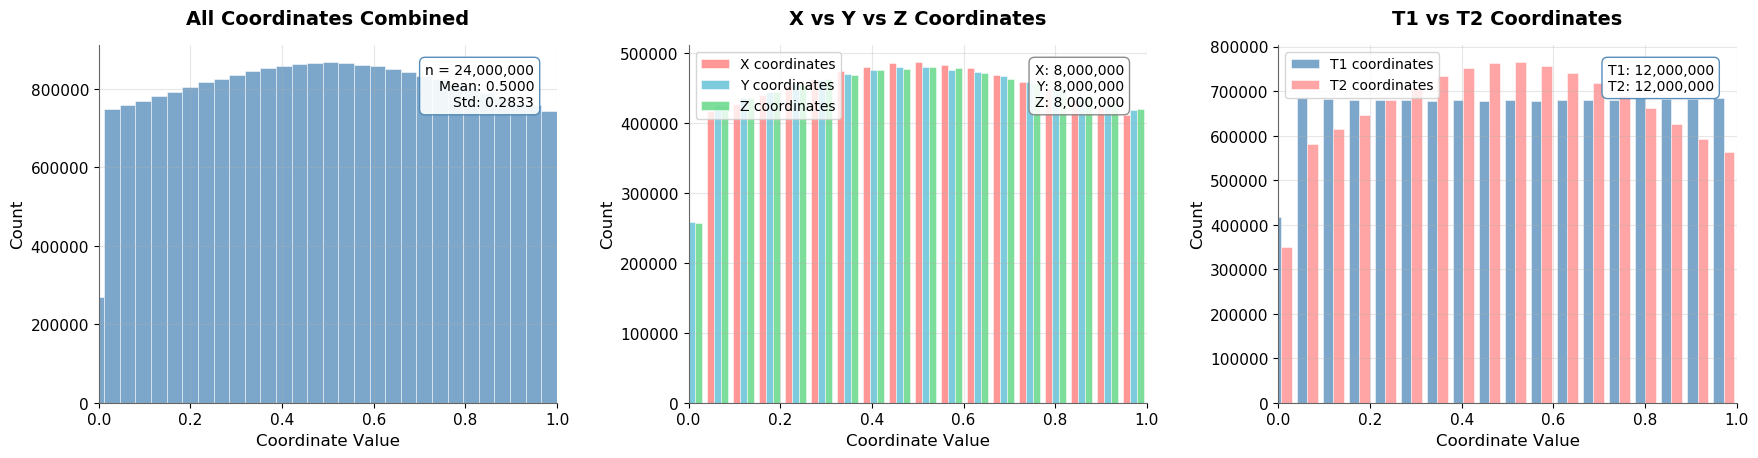


=== Uniformity Check ===
For uniform distribution [0,1]:
  Expected mean: 0.500
  Actual mean:   0.500040
  Expected std:  ~0.289
  Actual std:    0.283301
✓ Coordinates appear uniformly distributed (mean within 0.01 of 0.5)
📊 Summary statistics saved: plots/coordinate_analysis_summary_20250630_093510.txt


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

print("=== Coordinate Analysis ===")

# Get all coordinates together
all_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns])

print(f"Total coordinate values: {len(all_coords):,}")
print(f"Expected range: [0, 1]")
print(f"Actual range: [{all_coords.min():.6f}, {all_coords.max():.6f}]")
print(f"Mean: {all_coords.mean():.4f} (should be ~0.5 for uniform)")
print(f"Std: {all_coords.std():.4f}")

# Create plots directory if it doesn't exist
plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

# Set up the figure with better styling
plt.style.use('default')
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.alpha': 0.3,
    'font.size': 11
})

# Create the combined figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Simple histogram of ALL coordinates
axes[0].hist(all_coords, bins=50, color='steelblue', alpha=0.7, edgecolor='white', linewidth=0.5)
axes[0].set_title('All Coordinates Combined', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Coordinate Value', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xlim(0, 1)
axes[0].grid(True, alpha=0.3)

# Add statistics to Plot 1
stats_text = f'n = {len(all_coords):,}\nMean: {all_coords.mean():.4f}\nStd: {all_coords.std():.4f}'
axes[0].text(0.95, 0.95, stats_text, transform=axes[0].transAxes, 
            fontsize=10, va='top', ha='right',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9, edgecolor='steelblue'))

# Plot 2: Compare X, Y, Z coordinates
x_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns if col.endswith('_x')])
y_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns if col.endswith('_y')])
z_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns if col.endswith('_z')])

axes[1].hist([x_coords, y_coords, z_coords], bins=30, alpha=0.7, 
            label=['X coordinates', 'Y coordinates', 'Z coordinates'],
            color=['#FF6B6B', '#45B7D1', "#45D16F"], edgecolor='white', linewidth=0.5)
axes[1].set_title('X vs Y vs Z Coordinates', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Coordinate Value', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xlim(0, 1)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

# Add coordinate counts to Plot 2
coord_stats = f'X: {len(x_coords):,}\nY: {len(y_coords):,}\nZ: {len(z_coords):,}'
axes[1].text(0.95, 0.95, coord_stats, transform=axes[1].transAxes, 
            fontsize=10, va='top', ha='right',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9, edgecolor='gray'))

# Plot 3: T1 vs T2 comparison (if T2 exists)
if has_t2_columns(tetrahedron_dataset):
    t1_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns if col.startswith('T1')])
    t2_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns if col.startswith('T2')])
    
    axes[2].hist([t1_coords, t2_coords], bins=30, alpha=0.7,
                label=['T1 coordinates', 'T2 coordinates'],
                color=['steelblue', '#FF7F7F'], edgecolor='white', linewidth=0.5)
    axes[2].set_title('T1 vs T2 Coordinates', fontsize=14, fontweight='bold', pad=15)
    axes[2].legend(fontsize=10)
    
    # Add T1/T2 counts
    t_stats = f'T1: {len(t1_coords):,}\nT2: {len(t2_coords):,}'
    axes[2].text(0.95, 0.95, t_stats, transform=axes[2].transAxes, 
                fontsize=10, va='top', ha='right',
                bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9, edgecolor='steelblue'))
else:
    axes[2].hist(all_coords, bins=30, color='steelblue', alpha=0.7, edgecolor='white', linewidth=0.5)
    axes[2].set_title('T1 Coordinates Only', fontsize=14, fontweight='bold', pad=15)
    
    # Add note for single tetrahedron
    axes[2].text(0.95, 0.95, f'T1 only\nn = {len(all_coords):,}', transform=axes[2].transAxes, 
                fontsize=10, va='top', ha='right',
                bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9, edgecolor='steelblue'))

axes[2].set_xlabel('Coordinate Value', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)
axes[2].set_xlim(0, 1)
axes[2].grid(True, alpha=0.3)

# Clean up spines for all plots
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#666666')
    ax.spines['bottom'].set_color('#666666')

# Adjust layout for better spacing
plt.tight_layout(pad=2.0)

# Save the combined plot
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_filename = f"coordinate_analysis_combined_{timestamp}"

# Save as both PNG and PDF
png_path = os.path.join(plots_dir, f"{plot_filename}.png")
pdf_path = os.path.join(plots_dir, f"{plot_filename}.pdf")

plt.savefig(png_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
plt.savefig(pdf_path, bbox_inches='tight', facecolor='white', edgecolor='none')

print(f"\n💾 Combined coordinate analysis plots saved:")
print(f"   📷 PNG: {png_path}")
print(f"   📄 PDF: {pdf_path}")

plt.show()

# Quick statistical test for uniformity
print("\n=== Uniformity Check ===")
print("For uniform distribution [0,1]:")
print(f"  Expected mean: 0.500")
print(f"  Actual mean:   {all_coords.mean():.6f}")
print(f"  Expected std:  ~0.289")  # sqrt(1/12) for uniform [0,1]
print(f"  Actual std:    {all_coords.std():.6f}")

mean_diff = abs(all_coords.mean() - 0.5)
if mean_diff < 0.01:
    print(f"✓ Coordinates appear uniformly distributed (mean within 0.01 of 0.5)")
else:
    print(f"⚠ Coordinates may not be uniformly distributed (mean differs by {mean_diff:.6f})")

# Save summary statistics to a text file
summary_path = os.path.join(plots_dir, f"coordinate_analysis_summary_{timestamp}.txt")
with open(summary_path, 'w') as f:
    f.write(f"COORDINATE ANALYSIS SUMMARY\n")
    f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"=" * 50 + "\n\n")
    
    f.write(f"Total coordinate values: {len(all_coords):,}\n")
    f.write(f"Expected range: [0, 1]\n")
    f.write(f"Actual range: [{all_coords.min():.6f}, {all_coords.max():.6f}]\n")
    f.write(f"Mean: {all_coords.mean():.6f} (expected: 0.500)\n")
    f.write(f"Std: {all_coords.std():.6f} (expected: ~0.289)\n\n")
    
    if has_t2_columns(tetrahedron_dataset):
        f.write(f"X coordinates: {len(x_coords):,}\n")
        f.write(f"Y coordinates: {len(y_coords):,}\n")
        f.write(f"Z coordinates: {len(z_coords):,}\n")
        f.write(f"T1 coordinates: {len(t1_coords):,}\n")
        f.write(f"T2 coordinates: {len(t2_coords):,}\n\n")
    
    f.write(f"Uniformity Check:\n")
    f.write(f"Mean difference from 0.5: {mean_diff:.6f}\n")
    uniformity_result = "PASS" if mean_diff < 0.01 else "FAIL"
    f.write(f"Uniformity test: {uniformity_result}\n")

print(f"📊 Summary statistics saved: {summary_path}")

#### Tetrahedron volume distribution

Starting volume calculations...
Processing row 0 / 1,000,000
Processing row 500,000 / 1,000,000
Volume calculations complete!
✅ Image 1 saved: volume_analysis_plots/t1_t2_volume_distributions_20250630_093810.png


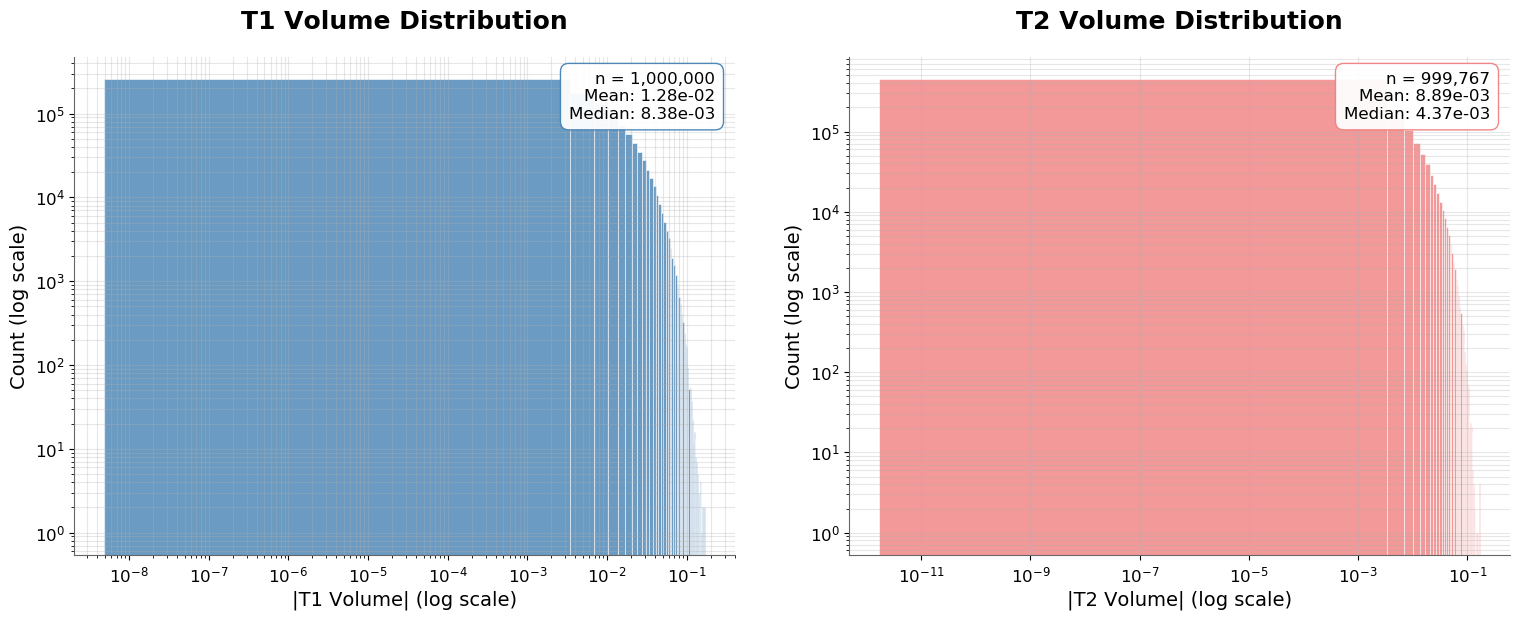

In [17]:
### T1 and T2 Volume Distribution Analysis ###
import src.GeometryUtils as gu
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

def extract_t1_vertices(row):
    """Extract T1 tetrahedron vertices from a DataFrame row"""
    return torch.tensor([
        [row['T1_v1_x'], row['T1_v1_y'], row['T1_v1_z']],
        [row['T1_v2_x'], row['T1_v2_y'], row['T1_v2_z']],
        [row['T1_v3_x'], row['T1_v3_y'], row['T1_v3_z']],
        [row['T1_v4_x'], row['T1_v4_y'], row['T1_v4_z']]
    ], dtype=torch.float64)

def extract_t2_vertices(row):
    """Extract T2 tetrahedron vertices from a DataFrame row"""
    return torch.tensor([
        [row['T2_v1_x'], row['T2_v1_y'], row['T2_v1_z']],
        [row['T2_v2_x'], row['T2_v2_y'], row['T2_v2_z']],
        [row['T2_v3_x'], row['T2_v3_y'], row['T2_v3_z']],
        [row['T2_v4_x'], row['T2_v4_y'], row['T2_v4_z']]
    ], dtype=torch.float64)

# === Volume Calculation ===
print("Starting volume calculations...")
t1_volumes = []
t2_volumes = []
intersection_status = []

# Process all rows with progress tracking
total_rows = len(tetrahedron_dataset)
for i, (_, row) in enumerate(tetrahedron_dataset.iterrows()):
    if i % 500000 == 0:  # Progress every 500k rows
        print(f"Processing row {i:,} / {total_rows:,}")
    
    try:
        # Calculate T1 volume
        t1_vertices = extract_t1_vertices(row)
        volume_t1 = gu.calculate_tetrahedron_volume(t1_vertices)
        t1_volumes.append(volume_t1.item())
        
        # Calculate T2 volume if T2 columns exist
        if has_t2_columns(tetrahedron_dataset):
            t2_vertices = extract_t2_vertices(row)
            volume_t2 = gu.calculate_tetrahedron_volume(t2_vertices)
            t2_volumes.append(volume_t2.item())
        
        # Store intersection status
        intersection_status.append(row['HasIntersection'])
        
    except Exception as e:
        print(f"Error processing row {i}: {e}")
        continue

print("Volume calculations complete!")

# Convert to numpy arrays for analysis
volumes_t1 = np.array(t1_volumes)
volumes_t2 = np.array(t2_volumes) if t2_volumes else None
intersection_status = np.array(intersection_status)

# === Create export directory ===
output_dir = "volume_analysis_plots"
os.makedirs(output_dir, exist_ok=True)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# === IMAGE 1: T1 and T2 Volume Distributions ===
if has_t2_columns(tetrahedron_dataset) and volumes_t2 is not None:
    # Set up the figure with clean styling
    plt.style.use('default')
    plt.rcParams.update({
        'figure.facecolor': 'white',
        'axes.facecolor': 'white',
        'axes.grid': True,
        'grid.alpha': 0.3,
        'font.size': 12
    })
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # Prepare data for log scale (handle negative volumes)
    abs_volumes_t1 = np.abs(volumes_t1)
    abs_volumes_t2 = np.abs(volumes_t2)
    
    # Filter out zero and very small values for log scale
    log_threshold = 1e-12
    t1_log_mask = abs_volumes_t1 > log_threshold
    t2_log_mask = abs_volumes_t2 > log_threshold
    
    # Plot 1: T1 Volume Distribution (Log Scale)
    t1_clean = abs_volumes_t1[t1_log_mask]
    if len(t1_clean) > 0:
        axes[0].hist(t1_clean, bins=50, color='steelblue', alpha=0.8, edgecolor='white', linewidth=0.5)
        axes[0].set_xscale('log')
        axes[0].set_yscale('log')
        axes[0].set_title('T1 Volume Distribution', fontsize=18, fontweight='bold', pad=20)
        axes[0].set_xlabel('|T1 Volume| (log scale)', fontsize=14)
        axes[0].set_ylabel('Count (log scale)', fontsize=14)
        axes[0].grid(alpha=0.3, which='both')
        
        # Add statistics
        mean_t1 = t1_clean.mean()
        median_t1 = np.median(t1_clean)
        axes[0].text(0.97, 0.97, f'n = {len(t1_clean):,}\nMean: {mean_t1:.2e}\nMedian: {median_t1:.2e}', 
                     transform=axes[0].transAxes, fontsize=12, 
                     verticalalignment='top', horizontalalignment='right',
                     bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.95, edgecolor='steelblue'))
    
    # Plot 2: T2 Volume Distribution (Log Scale)
    t2_clean = abs_volumes_t2[t2_log_mask]
    if len(t2_clean) > 0:
        axes[1].hist(t2_clean, bins=50, color='lightcoral', alpha=0.8, edgecolor='white', linewidth=0.5)
        axes[1].set_xscale('log')
        axes[1].set_yscale('log')
        axes[1].set_title('T2 Volume Distribution', fontsize=18, fontweight='bold', pad=20)
        axes[1].set_xlabel('|T2 Volume| (log scale)', fontsize=14)
        axes[1].set_ylabel('Count (log scale)', fontsize=14)
        axes[1].grid(alpha=0.3, which='both')
        
        # Add statistics
        mean_t2 = t2_clean.mean()
        median_t2 = np.median(t2_clean)
        axes[1].text(0.97, 0.97, f'n = {len(t2_clean):,}\nMean: {mean_t2:.2e}\nMedian: {median_t2:.2e}', 
                     transform=axes[1].transAxes, fontsize=12, 
                     verticalalignment='top', horizontalalignment='right',
                     bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.95, edgecolor='lightcoral'))
    
    # Clean up spines
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('#666666')
        ax.spines['bottom'].set_color('#666666')
    
    # Adjust layout
    plt.tight_layout(pad=3.0)
    
    # Save IMAGE 1
    export_filename_1 = f"{output_dir}/t1_t2_volume_distributions_{timestamp}.png"
    plt.savefig(export_filename_1, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✅ Image 1 saved: {export_filename_1}")
    
    plt.show()
    
else:
    print("❌ T2 columns not found - cannot create volume distribution plots")

✅ Image 2 saved: volume_analysis_plots/intersection_cases_analysis_20250630_093810.png


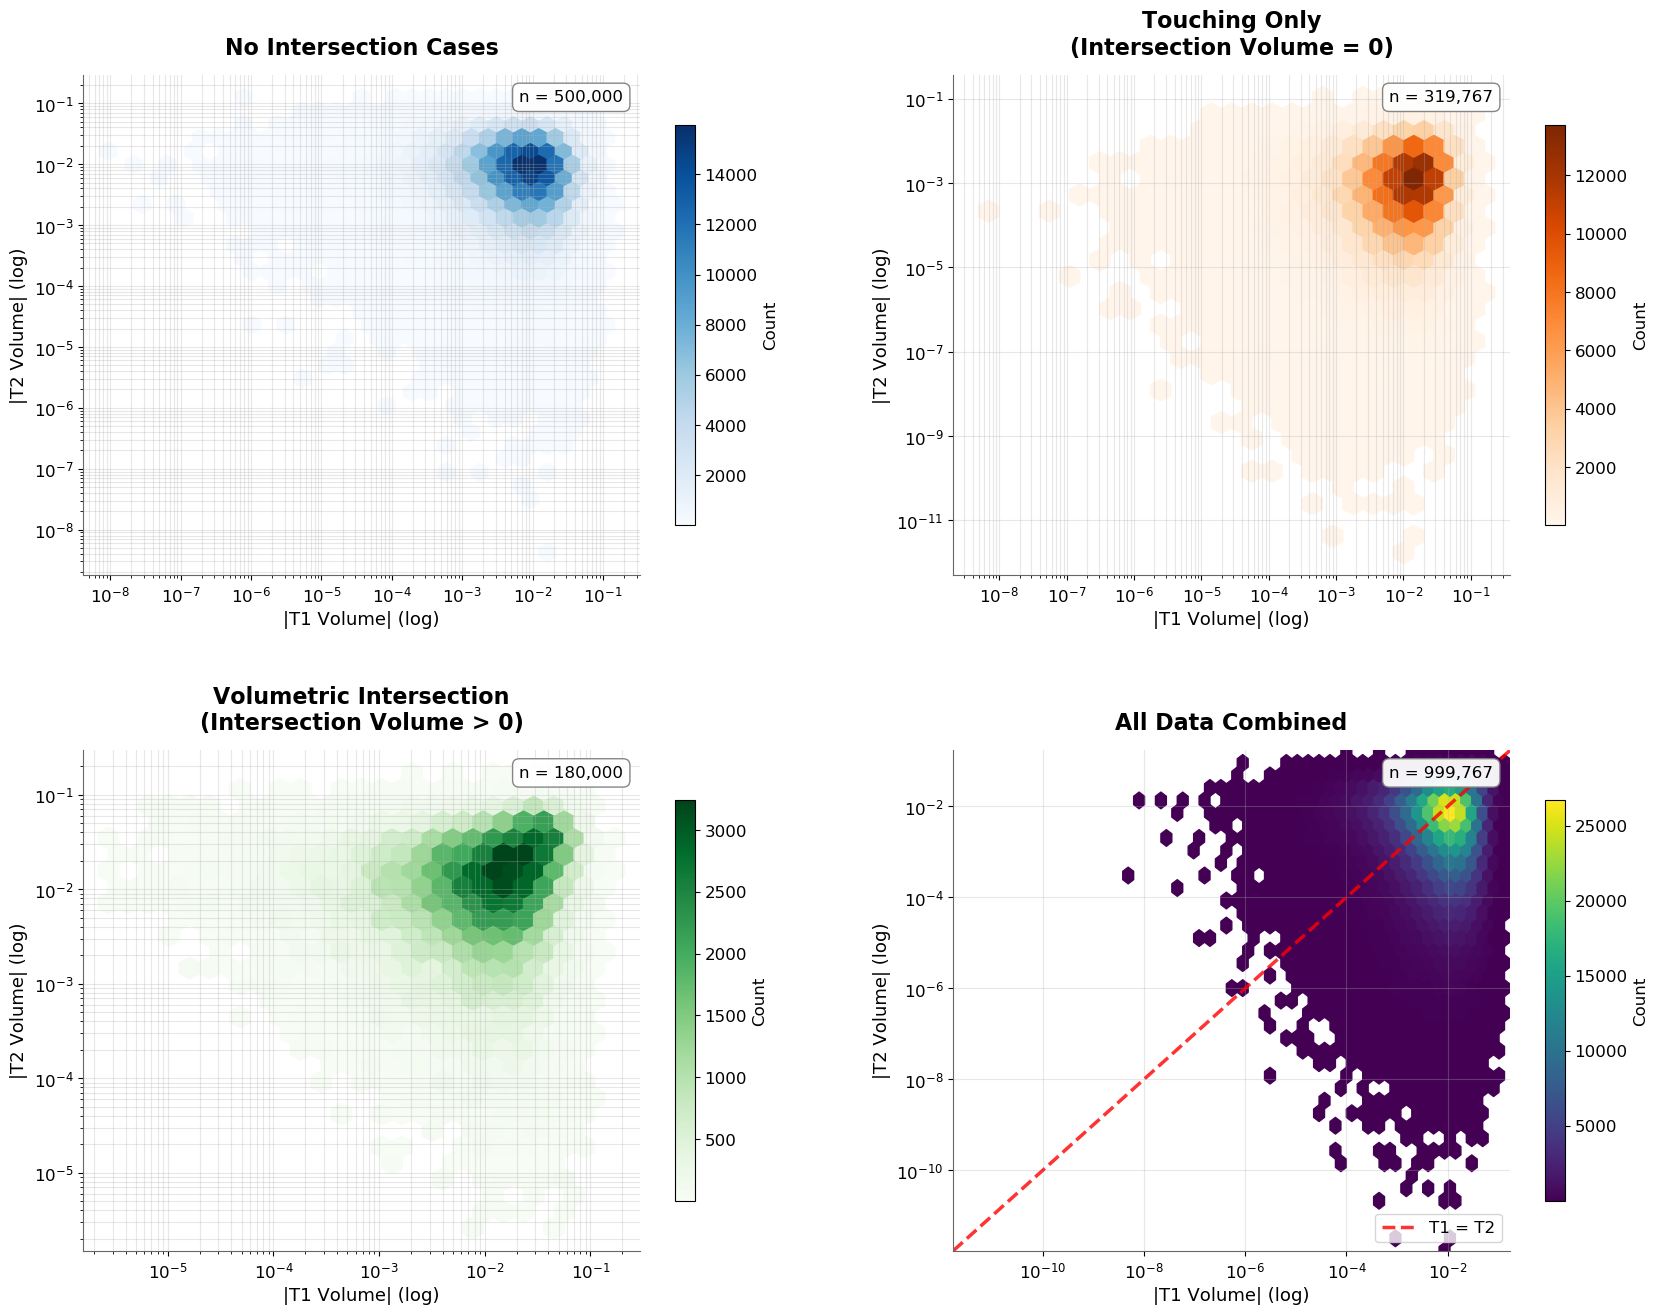


=== Enhanced Volume Statistics (Log Scale Analysis) ===
T1 volumes: n=1,000,000
T1 range: 4.90e-09 to 1.70e-01
T1 mean: 1.28e-02
T2 volumes: n=1,000,000
T2 range: 0.00e+00 to 1.70e-01
T2 mean: 8.89e-03

Log Scale Data Availability:
T1 volumes suitable for log scale: 1,000,000 (100.0%)
T2 volumes suitable for log scale: 999,767 (100.0%)

=== Volume Statistics by Intersection Status ===
No Intersection (500,000 samples):
  T1 - Mean: 1.04e-02, Std: 1.10e-02
  T2 - Mean: 1.05e-02, Std: 1.11e-02
Touching Only (320,000 samples):
  T1 - Mean: 1.48e-02, Std: 1.45e-02
  T2 - Mean: 2.47e-03, Std: 4.73e-03
Volumetric Intersection (180,000 samples):
  T1 - Mean: 1.60e-02, Std: 1.64e-02
  T2 - Mean: 1.60e-02, Std: 1.65e-02

✅ Analysis complete! Plots saved to 'volume_analysis_plots' directory:
   📊 Image 1: T1 & T2 volume distributions
   📊 Image 2: Intersection cases analysis


In [18]:
# === IMAGE 2: Intersection Cases Analysis (4 plots) ===
if has_t2_columns(tetrahedron_dataset) and volumes_t2 is not None:
    
    # Create masks for different intersection categories
    no_intersection_mask = intersection_status == 0
    has_intersection_mask = intersection_status == 1
    
    # For the bonus: separate cases with volume = 0 from volume > 0
    if 'IntersectionVolume' in tetrahedron_dataset.columns:
        intersection_volumes = tetrahedron_dataset['IntersectionVolume'].values[:len(intersection_status)]
        touching_only_mask = (intersection_status == 1) & (intersection_volumes == 0)
        volumetric_intersection_mask = (intersection_status == 1) & (intersection_volumes > 0)
    else:
        touching_only_mask = None
        volumetric_intersection_mask = has_intersection_mask
    
    # Set up the figure for intersection cases
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    
    # Prepare data for log scale
    abs_volumes_t1 = np.abs(volumes_t1)
    abs_volumes_t2 = np.abs(volumes_t2)
    log_threshold = 1e-12
    
    # Plot 1: Joint Distribution - No Intersection (Log Scale)
    no_int_t1 = abs_volumes_t1[no_intersection_mask]
    no_int_t2 = abs_volumes_t2[no_intersection_mask]
    no_int_mask = (no_int_t1 > log_threshold) & (no_int_t2 > log_threshold)
    no_int_t1_clean = no_int_t1[no_int_mask]
    no_int_t2_clean = no_int_t2[no_int_mask]
    
    if len(no_int_t1_clean) > 0:
        hb_no_int = axes[0,0].hexbin(no_int_t1_clean, no_int_t2_clean, gridsize=30, 
                                     cmap='Blues', mincnt=1, xscale='log', yscale='log')
        axes[0,0].set_title('No Intersection Cases', fontsize=16, fontweight='bold', pad=15)
        axes[0,0].set_xlabel('|T1 Volume| (log)', fontsize=13)
        axes[0,0].set_ylabel('|T2 Volume| (log)', fontsize=13)
        axes[0,0].grid(alpha=0.3, which='both')
        
        # Add sample count
        axes[0,0].text(0.97, 0.97, f'n = {len(no_int_t1_clean):,}', 
                       transform=axes[0,0].transAxes, fontsize=12, 
                       verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.95, edgecolor='gray'))
        
        cbar1 = fig.colorbar(hb_no_int, ax=axes[0,0], shrink=0.8)
        cbar1.set_label('Count', fontsize=12)
    else:
        axes[0,0].text(0.5, 0.5, 'No data available\nfor log visualization', 
                      transform=axes[0,0].transAxes, ha='center', va='center', fontsize=14,
                      bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
        axes[0,0].set_title('No Intersection Cases', fontsize=16, fontweight='bold', pad=15)
    
    # Plot 2: Joint Distribution - Touching Only (Log Scale)
    if touching_only_mask is not None and np.sum(touching_only_mask) > 0:
        touching_t1 = abs_volumes_t1[touching_only_mask]
        touching_t2 = abs_volumes_t2[touching_only_mask]
        touching_mask = (touching_t1 > log_threshold) & (touching_t2 > log_threshold)
        touching_t1_clean = touching_t1[touching_mask]
        touching_t2_clean = touching_t2[touching_mask]
        
        if len(touching_t1_clean) > 0:
            hb_touching = axes[0,1].hexbin(touching_t1_clean, touching_t2_clean, gridsize=25, 
                                          cmap='Oranges', mincnt=1, xscale='log', yscale='log')
            axes[0,1].set_title('Touching Only\n(Intersection Volume = 0)', fontsize=16, fontweight='bold', pad=15)
            axes[0,1].set_xlabel('|T1 Volume| (log)', fontsize=13)
            axes[0,1].set_ylabel('|T2 Volume| (log)', fontsize=13)
            axes[0,1].grid(alpha=0.3, which='both')
            
            # Add sample count
            axes[0,1].text(0.97, 0.97, f'n = {len(touching_t1_clean):,}', 
                           transform=axes[0,1].transAxes, fontsize=12, 
                           verticalalignment='top', horizontalalignment='right',
                           bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.95, edgecolor='gray'))
            
            cbar2 = fig.colorbar(hb_touching, ax=axes[0,1], shrink=0.8)
            cbar2.set_label('Count', fontsize=12)
        else:
            axes[0,1].text(0.5, 0.5, 'No data available\nfor log visualization', 
                          transform=axes[0,1].transAxes, ha='center', va='center', fontsize=14,
                          bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
            axes[0,1].set_title('Touching Only\n(Intersection Volume = 0)', fontsize=16, fontweight='bold', pad=15)
    else:
        axes[0,1].text(0.5, 0.5, 'No touching-only\ndata available', 
                      transform=axes[0,1].transAxes, ha='center', va='center', fontsize=14,
                      bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
        axes[0,1].set_title('Touching Only\n(Intersection Volume = 0)', fontsize=16, fontweight='bold', pad=15)
    
    # Plot 3: Joint Distribution - Intersection with Volume (Log Scale)
    if np.sum(volumetric_intersection_mask) > 0:
        volumetric_t1 = abs_volumes_t1[volumetric_intersection_mask]
        volumetric_t2 = abs_volumes_t2[volumetric_intersection_mask]
        volumetric_mask = (volumetric_t1 > log_threshold) & (volumetric_t2 > log_threshold)
        volumetric_t1_clean = volumetric_t1[volumetric_mask]
        volumetric_t2_clean = volumetric_t2[volumetric_mask]
        
        if len(volumetric_t1_clean) > 0:
            hb_volumetric = axes[1,0].hexbin(volumetric_t1_clean, volumetric_t2_clean, gridsize=25, 
                                            cmap='Greens', mincnt=1, xscale='log', yscale='log')
            axes[1,0].set_title('Volumetric Intersection\n(Intersection Volume > 0)', fontsize=16, fontweight='bold', pad=15)
            axes[1,0].set_xlabel('|T1 Volume| (log)', fontsize=13)
            axes[1,0].set_ylabel('|T2 Volume| (log)', fontsize=13)
            axes[1,0].grid(alpha=0.3, which='both')
            
            # Add sample count
            axes[1,0].text(0.97, 0.97, f'n = {len(volumetric_t1_clean):,}', 
                           transform=axes[1,0].transAxes, fontsize=12, 
                           verticalalignment='top', horizontalalignment='right',
                           bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.95, edgecolor='gray'))
            
            cbar3 = fig.colorbar(hb_volumetric, ax=axes[1,0], shrink=0.8)
            cbar3.set_label('Count', fontsize=12)
        else:
            axes[1,0].text(0.5, 0.5, 'No data available\nfor log visualization', 
                          transform=axes[1,0].transAxes, ha='center', va='center', fontsize=14,
                          bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
            axes[1,0].set_title('Volumetric Intersection\n(Intersection Volume > 0)', fontsize=16, fontweight='bold', pad=15)
    else:
        axes[1,0].text(0.5, 0.5, 'No volumetric intersection\ndata available', 
                      transform=axes[1,0].transAxes, ha='center', va='center', fontsize=14,
                      bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
        axes[1,0].set_title('Volumetric Intersection\n(Intersection Volume > 0)', fontsize=16, fontweight='bold', pad=15)
    
    # Plot 4: Joint Distribution - All Data (Log Scale)
    all_log_mask = (abs_volumes_t1 > log_threshold) & (abs_volumes_t2 > log_threshold)
    all_t1_clean = abs_volumes_t1[all_log_mask]
    all_t2_clean = abs_volumes_t2[all_log_mask]
    
    if len(all_t1_clean) > 0:
        hb_all = axes[1,1].hexbin(all_t1_clean, all_t2_clean, gridsize=35, 
                                  cmap='viridis', mincnt=1, xscale='log', yscale='log')
        axes[1,1].set_title('All Data Combined', fontsize=16, fontweight='bold', pad=15)
        axes[1,1].set_xlabel('|T1 Volume| (log)', fontsize=13)
        axes[1,1].set_ylabel('|T2 Volume| (log)', fontsize=13)
        axes[1,1].grid(alpha=0.3, which='both')
        
        # Add diagonal line for reference
        min_val = min(all_t1_clean.min(), all_t2_clean.min())
        max_val = max(all_t1_clean.max(), all_t2_clean.max())
        axes[1,1].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, linewidth=2.5, label='T1 = T2')
        axes[1,1].legend(fontsize=12, loc='lower right')
        
        # Add sample count
        axes[1,1].text(0.97, 0.97, f'n = {len(all_t1_clean):,}', 
                       transform=axes[1,1].transAxes, fontsize=12, 
                       verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.95, edgecolor='gray'))
        
        cbar4 = fig.colorbar(hb_all, ax=axes[1,1], shrink=0.8)
        cbar4.set_label('Count', fontsize=12)
    else:
        axes[1,1].text(0.5, 0.5, 'Insufficient data\nfor log visualization', 
                      transform=axes[1,1].transAxes, ha='center', va='center', fontsize=14,
                      bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
        axes[1,1].set_title('All Data Combined', fontsize=16, fontweight='bold', pad=15)
    
    # Clean up spines for all plots
    for i in range(2):
        for j in range(2):
            axes[i,j].spines['top'].set_visible(False)
            axes[i,j].spines['right'].set_visible(False)
            axes[i,j].spines['left'].set_color('#666666')
            axes[i,j].spines['bottom'].set_color('#666666')
    
    # Improve overall layout
    plt.subplots_adjust(left=0.08, right=0.95, top=0.92, bottom=0.08, hspace=0.35, wspace=0.25)
    
    # Save IMAGE 2
    export_filename_2 = f"{output_dir}/intersection_cases_analysis_{timestamp}.png"
    plt.savefig(export_filename_2, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✅ Image 2 saved: {export_filename_2}")
    
    plt.show()

else:
    print("❌ T2 columns not found - cannot create intersection analysis plots")

# === Enhanced Summary Statistics ===
print(f"\n=== Enhanced Volume Statistics (Log Scale Analysis) ===")
print(f"T1 volumes: n={len(volumes_t1):,}")
print(f"T1 range: {volumes_t1.min():.2e} to {volumes_t1.max():.2e}")
print(f"T1 mean: {volumes_t1.mean():.2e}")

if volumes_t2 is not None:
    print(f"T2 volumes: n={len(volumes_t2):,}")
    print(f"T2 range: {volumes_t2.min():.2e} to {volumes_t2.max():.2e}")
    print(f"T2 mean: {volumes_t2.mean():.2e}")
    
    # Log scale data statistics
    abs_volumes_t1 = np.abs(volumes_t1)
    abs_volumes_t2 = np.abs(volumes_t2)
    log_threshold = 1e-12
    t1_log_valid = np.sum(abs_volumes_t1 > log_threshold)
    t2_log_valid = np.sum(abs_volumes_t2 > log_threshold)
    
    print(f"\nLog Scale Data Availability:")
    print(f"T1 volumes suitable for log scale: {t1_log_valid:,} ({t1_log_valid/len(volumes_t1)*100:.1f}%)")
    print(f"T2 volumes suitable for log scale: {t2_log_valid:,} ({t2_log_valid/len(volumes_t2)*100:.1f}%)")
    
    # Breakdown by intersection status
    print(f"\n=== Volume Statistics by Intersection Status ===")
    
    # No intersection cases
    if np.sum(no_intersection_mask) > 0:
        no_int_t1 = volumes_t1[no_intersection_mask]
        no_int_t2 = volumes_t2[no_intersection_mask]
        print(f"No Intersection ({np.sum(no_intersection_mask):,} samples):")
        print(f"  T1 - Mean: {no_int_t1.mean():.2e}, Std: {no_int_t1.std():.2e}")
        print(f"  T2 - Mean: {no_int_t2.mean():.2e}, Std: {no_int_t2.std():.2e}")
    
    # Touching only cases
    if touching_only_mask is not None and np.sum(touching_only_mask) > 0:
        touching_t1 = volumes_t1[touching_only_mask]
        touching_t2 = volumes_t2[touching_only_mask]
        print(f"Touching Only ({np.sum(touching_only_mask):,} samples):")
        print(f"  T1 - Mean: {touching_t1.mean():.2e}, Std: {touching_t1.std():.2e}")
        print(f"  T2 - Mean: {touching_t2.mean():.2e}, Std: {touching_t2.std():.2e}")
    
    # Volumetric intersection cases
    if np.sum(volumetric_intersection_mask) > 0:
        volumetric_t1 = volumes_t1[volumetric_intersection_mask]
        volumetric_t2 = volumes_t2[volumetric_intersection_mask]
        print(f"Volumetric Intersection ({np.sum(volumetric_intersection_mask):,} samples):")
        print(f"  T1 - Mean: {volumetric_t1.mean():.2e}, Std: {volumetric_t1.std():.2e}")
        print(f"  T2 - Mean: {volumetric_t2.mean():.2e}, Std: {volumetric_t2.std():.2e}")

print(f"\n✅ Analysis complete! Plots saved to '{output_dir}' directory:")
print(f"   📊 Image 1: T1 & T2 volume distributions")
print(f"   📊 Image 2: Intersection cases analysis")

Distribution centered around zero: No

💾 Plots saved: plots/volume_difference_20250630_093824.png


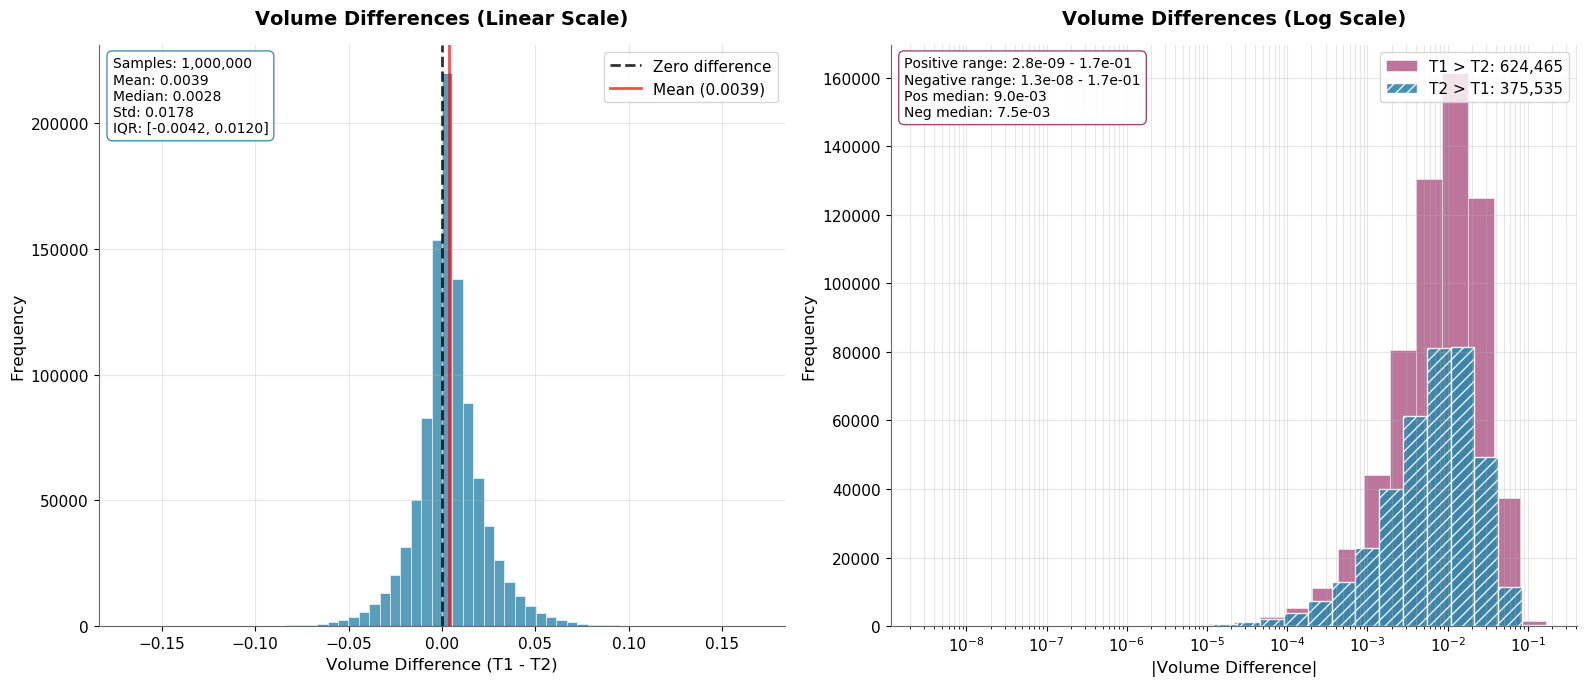


=== Volume Difference Summary ===
📊 1,000,000 tetrahedron pairs analyzed
📈 Full range: -0.167099 to 0.167099
📊 Typical magnitude: ±0.167099
📊 Central tendency: 0.003928 ± 0.017754

🎯 Distribution percentiles:
   P 5: -0.024085 (T2 larger)
   P25: -0.004220 (T2 larger)
   P50: 0.002800 (T1 larger)
   P75: 0.012011 (T1 larger)
   P95: 0.034071 (T1 larger)

🔍 Size comparison:
   T1 larger: 624,465 (62.4%)
   T2 larger: 375,535 (37.6%)
   Balance: ⚠️  Imbalanced (concerning - ratio: 1.66)

📏 Difference magnitudes:
   Small (< 0.01): 556,894 (55.7%)
   Medium (0.01-0.1): 442,801 (44.3%)
   Large (> 0.1): 305 (0.0%)

🎲 Randomness Assessment:
   ❌ Randomness quality: poor
   Mean/Std ratio: 0.2213 (lower is better)
   Expected for random: ~0.0

📊 Statistical test:
   Result: significant difference from zero (p = 0.000000)
   Interpretation: statistically significant but practically negligible
📄 Enhanced summary saved: plots/volume_difference_summary_20250630_093824.txt


In [19]:
### === Volume Difference Analysis (T1 - T2) ===
if has_t2_columns(tetrahedron_dataset):
    # Calculate the difference in volumes
    volume_diff = np.array(t1_volumes) - np.array(t2_volumes)

    # Check if distribution is centered around zero (expected for random tetrahedra)
    zero_centered = abs(volume_diff.mean()) < volume_diff.std() * 0.1
    print(f"Distribution centered around zero: {'Yes' if zero_centered else 'No'}")
    
    # === IMPROVED DUAL SCALE PLOTS ===
    plt.style.use('default')
    plt.rcParams.update({
        'figure.facecolor': 'white',
        'axes.facecolor': 'white',
        'axes.grid': True,
        'grid.alpha': 0.3,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'font.size': 11
    })
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # Set spine colors after creating axes
    for ax in [ax1, ax2]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('#666666')
        ax.spines['bottom'].set_color('#666666')
    
    # LEFT: Linear scale with improved metrics and colors
    counts_lin, bins_lin, patches_lin = ax1.hist(volume_diff, bins=60, alpha=0.8, 
                                                color='#2E86AB', edgecolor='white', linewidth=0.5)
    
    # Add zero reference line with better styling
    ax1.axvline(x=0, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Zero difference')
    
    # Add mean line for reference
    mean_val = volume_diff.mean()
    ax1.axvline(x=mean_val, color='red', linestyle='-', linewidth=2, alpha=0.7, label=f'Mean ({mean_val:.4f})')
    
    ax1.set_title('Volume Differences (Linear Scale)', fontsize=14, fontweight='bold', pad=15)
    ax1.set_xlabel('Volume Difference (T1 - T2)', fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper right')
    
    # More intuitive stats box with percentiles
    std_val = volume_diff.std()
    median_val = np.median(volume_diff)
    q25, q75 = np.percentile(volume_diff, [25, 75])
    
    stats_text = f'Samples: {len(volume_diff):,}\nMean: {mean_val:.4f}\nMedian: {median_val:.4f}\nStd: {std_val:.4f}\nIQR: [{q25:.4f}, {q75:.4f}]'
    ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes, fontsize=10, va='top', ha='left',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9, edgecolor='#2E86AB'))
    
    # RIGHT: Improved log scale with much better visibility
    positive_diffs = volume_diff[volume_diff > 0]
    negative_diffs = np.abs(volume_diff[volume_diff < 0])

    if len(positive_diffs) > 0 and len(negative_diffs) > 0:
        # Create separate log bins for better readability
        pos_min, pos_max = positive_diffs.min(), positive_diffs.max()
        neg_min, neg_max = negative_diffs.min(), negative_diffs.max()
        
        # Use different bin strategies for better separation
        pos_log_min, pos_log_max = np.log10(pos_min), np.log10(pos_max)
        neg_log_min, neg_log_max = np.log10(neg_min), np.log10(neg_max)
        
        # Create bins with more spacing
        bins_pos = np.logspace(pos_log_min, pos_log_max, 25)
        bins_neg = np.logspace(neg_log_min, neg_log_max, 25)
        
        # Plot T1 > T2 (positive) as filled bars with transparency
        ax2.hist(positive_diffs, bins=bins_pos, alpha=0.7, color='#A23B72', 
                label=f'T1 > T2: {len(positive_diffs):,}', edgecolor='white', linewidth=0.5)
        
        # Plot T2 > T1 (negative) with better visibility - remove hatch_color parameter
        ax2.hist(negative_diffs, bins=bins_neg, alpha=0.9, color='#2E86AB', 
                label=f'T2 > T1: {len(negative_diffs):,}', edgecolor='white', 
                linewidth=1, hatch='///')
        
        ax2.set_xscale('log')
        ax2.set_title('Volume Differences (Log Scale)', fontsize=14, fontweight='bold', pad=15)
        ax2.set_xlabel('|Volume Difference|', fontsize=12)
        ax2.set_ylabel('Frequency', fontsize=12)
        ax2.grid(True, alpha=0.3, which='both')
        ax2.legend(loc='upper right', fontsize=11)
        
        # Better range display with more details
        pos_median = np.median(positive_diffs)
        neg_median = np.median(negative_diffs)
        
        range_stats = f'Positive range: {pos_min:.1e} - {pos_max:.1e}\nNegative range: {neg_min:.1e} - {neg_max:.1e}\nPos median: {pos_median:.1e}\nNeg median: {neg_median:.1e}'
        ax2.text(0.02, 0.98, range_stats, transform=ax2.transAxes, 
                fontsize=10, va='top', ha='left',
                bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.95, edgecolor='#A23B72'))
    
    elif len(positive_diffs) > 0:
        # Only positive differences
        bins_pos = np.logspace(np.log10(positive_diffs.min()), np.log10(positive_diffs.max()), 30)
        ax2.hist(positive_diffs, bins=bins_pos, alpha=0.8, color='#A23B72', 
                label=f'T1 > T2: {len(positive_diffs):,}', edgecolor='white', linewidth=0.5)
        
        ax2.set_xscale('log')
        ax2.set_title('Volume Differences (Log Scale) - Only Positive', fontsize=14, fontweight='bold', pad=15)
        ax2.set_xlabel('Volume Difference (T1 - T2)', fontsize=12)
        ax2.set_ylabel('Frequency', fontsize=12)
        ax2.grid(True, alpha=0.3, which='both')
        ax2.legend(loc='upper right')
        
    elif len(negative_diffs) > 0:
        # Only negative differences
        bins_neg = np.logspace(np.log10(negative_diffs.min()), np.log10(negative_diffs.max()), 30)
        ax2.hist(negative_diffs, bins=bins_neg, alpha=0.8, color='#2E86AB', 
                label=f'T2 > T1: {len(negative_diffs):,}', edgecolor='white', linewidth=0.5)
        
        ax2.set_xscale('log')
        ax2.set_title('Volume Differences (Log Scale) - Only Negative', fontsize=14, fontweight='bold', pad=15)
        ax2.set_xlabel('|Volume Difference (T2 - T1)|', fontsize=12)
        ax2.set_ylabel('Frequency', fontsize=12)
        ax2.grid(True, alpha=0.3, which='both')
        ax2.legend(loc='upper right')
        
    else:
        # No valid differences for log scale
        ax2.text(0.5, 0.5, 'No valid differences\nfor log scale display', 
                transform=ax2.transAxes, ha='center', va='center', fontsize=14,
                bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
        ax2.set_title('Volume Differences (Log Scale) - No Data', fontsize=14, fontweight='bold', pad=15)
    
    plt.tight_layout()
    
    # === SAVE PLOTS ===
    from datetime import datetime
    import os
    
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    plots_dir = "plots"
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)
    
    plot_filename = f"volume_difference_{timestamp}"
    png_path = os.path.join(plots_dir, f"{plot_filename}.png")
    pdf_path = os.path.join(plots_dir, f"{plot_filename}.pdf")
    
    plt.savefig(png_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.savefig(pdf_path, bbox_inches='tight', facecolor='white')
    
    print(f"\n💾 Plots saved: {png_path}")
    plt.show()
    
    # === ENHANCED SUMMARY WITH MORE INTUITIVE METRICS ===
    print(f"\n=== Volume Difference Summary ===")
    print(f"📊 {len(volume_diff):,} tetrahedron pairs analyzed")
    
    # More intuitive range description
    abs_max = max(abs(volume_diff.min()), abs(volume_diff.max()))
    print(f"📈 Full range: {volume_diff.min():.6f} to {volume_diff.max():.6f}")
    print(f"📊 Typical magnitude: ±{abs_max:.6f}")
    print(f"📊 Central tendency: {volume_diff.mean():.6f} ± {volume_diff.std():.6f}")
    
    # Percentile-based insights (more intuitive than just mean/std)
    percentiles = [5, 25, 50, 75, 95]
    p_values = np.percentile(volume_diff, percentiles)
    print(f"\n🎯 Distribution percentiles:")
    for p, val in zip(percentiles, p_values):
        direction = "T1 larger" if val > 0 else "T2 larger" if val < 0 else "Equal"
        print(f"   P{p:2d}: {val:8.6f} ({direction})")
    
    # Distribution breakdown with more context
    pos_count = np.sum(volume_diff > 0)
    neg_count = np.sum(volume_diff < 0)
    zero_count = np.sum(volume_diff == 0)
    
    pos_pct = pos_count / len(volume_diff) * 100
    neg_pct = neg_count / len(volume_diff) * 100
    zero_pct = zero_count / len(volume_diff) * 100
    
    print(f"\n🔍 Size comparison:")
    print(f"   T1 larger: {pos_count:,} ({pos_pct:.1f}%)")
    print(f"   T2 larger: {neg_count:,} ({neg_pct:.1f}%)")
    if zero_count > 0:
        print(f"   Equal size: {zero_count:,} ({zero_pct:.1f}%)")
    
    # More intuitive balance assessment
    balance_ratio = pos_pct / neg_pct if neg_pct > 0 else float('inf')
    if 0.95 <= balance_ratio <= 1.05:
        balance_status = "✅ Perfectly balanced"
        balance_quality = "excellent"
    elif 0.9 <= balance_ratio <= 1.1:
        balance_status = "✅ Well balanced"
        balance_quality = "very good"
    elif 0.8 <= balance_ratio <= 1.25:
        balance_status = "✅ Reasonably balanced"
        balance_quality = "acceptable"
    else:
        balance_status = "⚠️  Imbalanced"
        balance_quality = "concerning"
    
    print(f"   Balance: {balance_status} ({balance_quality} - ratio: {balance_ratio:.2f})")
    
    # Magnitude analysis (more practical insights)
    small_diffs = np.sum(np.abs(volume_diff) < 0.01)
    medium_diffs = np.sum((np.abs(volume_diff) >= 0.01) & (np.abs(volume_diff) < 0.1))
    large_diffs = np.sum(np.abs(volume_diff) >= 0.1)
    
    print(f"\n📏 Difference magnitudes:")
    print(f"   Small (< 0.01): {small_diffs:,} ({small_diffs/len(volume_diff)*100:.1f}%)")
    print(f"   Medium (0.01-0.1): {medium_diffs:,} ({medium_diffs/len(volume_diff)*100:.1f}%)")
    print(f"   Large (> 0.1): {large_diffs:,} ({large_diffs/len(volume_diff)*100:.1f}%)")
    
    # Enhanced randomness check
    print(f"\n🎲 Randomness Assessment:")
    mean_to_std_ratio = abs(volume_diff.mean()) / volume_diff.std()
    
    if mean_to_std_ratio < 0.05:
        randomness_level = "excellent"
        randomness_icon = "✅"
    elif mean_to_std_ratio < 0.1:
        randomness_level = "very good"
        randomness_icon = "✅"
    elif mean_to_std_ratio < 0.2:
        randomness_level = "acceptable"
        randomness_icon = "⚠️"
    else:
        randomness_level = "poor"
        randomness_icon = "❌"
    
    print(f"   {randomness_icon} Randomness quality: {randomness_level}")
    print(f"   Mean/Std ratio: {mean_to_std_ratio:.4f} (lower is better)")
    print(f"   Expected for random: ~0.0")
    
    # Statistical significance with practical interpretation
    from scipy import stats
    t_stat, p_value = stats.ttest_1samp(volume_diff, 0)
    significance = "significant" if p_value < 0.05 else "not significant"
    
    print(f"\n📊 Statistical test:")
    print(f"   Result: {significance} difference from zero (p = {p_value:.6f})")
    if p_value < 0.05:
        practical_meaning = "systematic bias detected" if abs(volume_diff.mean()) > 0.01 else "statistically significant but practically negligible"
        print(f"   Interpretation: {practical_meaning}")
    else:
        print(f"   Interpretation: no systematic bias detected")
    
    # Save enhanced summary
    report_path = os.path.join(plots_dir, f"volume_difference_summary_{timestamp}.txt")
    with open(report_path, 'w') as f:
        f.write(f"ENHANCED VOLUME DIFFERENCE ANALYSIS\n")
        f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write(f"=" * 50 + "\n\n")
        
        f.write(f"Dataset: {len(volume_diff):,} tetrahedron pairs\n")
        f.write(f"Range: {volume_diff.min():.6f} to {volume_diff.max():.6f}\n")
        f.write(f"Mean ± Std: {volume_diff.mean():.6f} ± {volume_diff.std():.6f}\n\n")
        
        f.write(f"Percentiles:\n")
        for p, val in zip(percentiles, p_values):
            f.write(f"  P{p:2d}: {val:8.6f}\n")
        f.write(f"\n")
        
        f.write(f"Distribution:\n")
        f.write(f"  T1 > T2: {pos_count:,} ({pos_pct:.1f}%)\n")
        f.write(f"  T2 > T1: {neg_count:,} ({neg_pct:.1f}%)\n")
        if zero_count > 0:
            f.write(f"  Equal: {zero_count:,} ({zero_pct:.1f}%)\n")
        f.write(f"  Balance quality: {balance_quality}\n\n")
        
        f.write(f"Randomness assessment: {randomness_level}\n")
        f.write(f"Mean/Std ratio: {mean_to_std_ratio:.4f}\n\n")
        
        f.write(f"Statistical Test (t-test vs zero):\n")
        f.write(f"  t-statistic: {t_stat:.4f}\n")
        f.write(f"  p-value: {p_value:.6f}\n")
        f.write(f"  Result: {significance}\n")
    
    print(f"📄 Enhanced summary saved: {report_path}")
    
else:
    print("❌ No T2 columns found - cannot compute volume differences")

#### Intersection volume distribution

=== Intersection Volume Analysis ===
📊 Dataset Overview:
   Total samples: 1,000,000
   No intersection: 500,000 (50.0%)
   Has intersection: 500,000 (50.0%)
     ├─ Real volume overlap: 180,000 (18.0%)
     └─ Just touching: 320,000 (32.0%)

🔍 Volume Statistics:
   Range: 1.00e-04 to 2.00e+01
   Median: 4.47e-02
   Spans 5.3 orders of magnitude

💾 Plot saved: plots/volume_distribution_20250630_093828.png


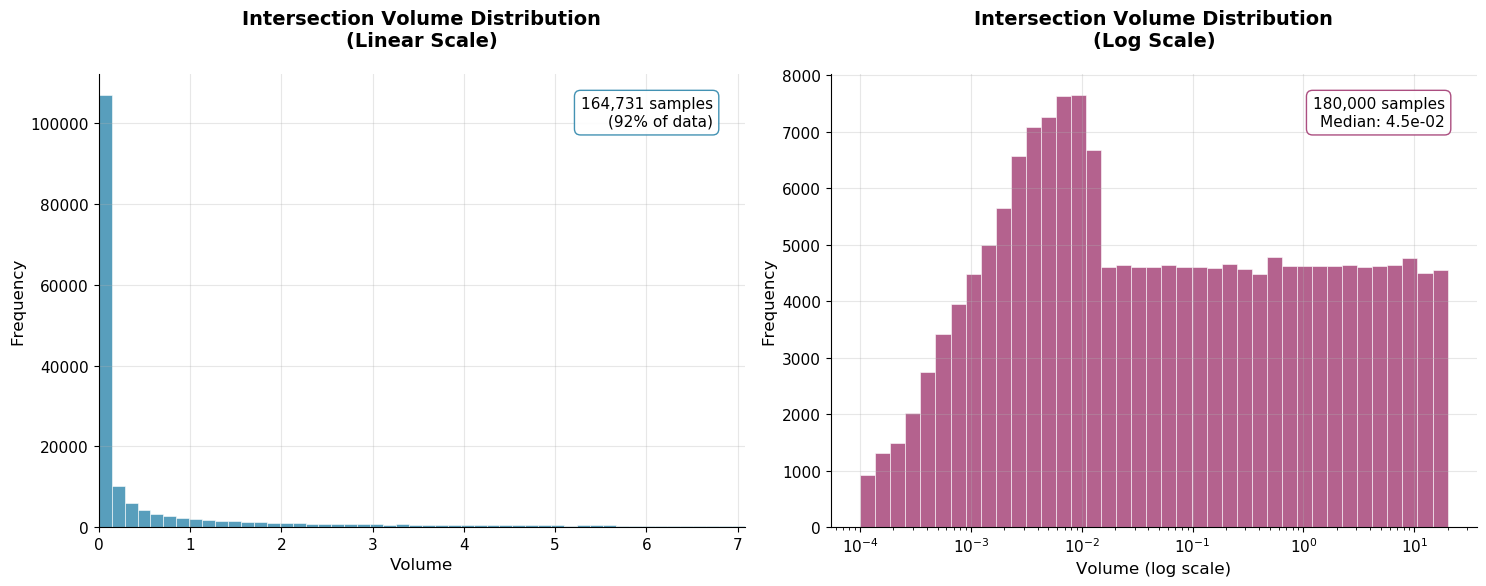


📈 Summary:
   • 180,000 intersection volumes analyzed
   • Range: 1.0e-04 to 2.0e+01
   • Most common: 4.5e-02 (median)
   • Size distribution:
     - Small (< 1e-04): 101,907 (57%)
     - Medium (1e-04 to 1e-02): 72,858 (40%)
     - Large (> 1e-02): 5,235 (3%)

   • Size distribution (dataset scale, scaled by 1000x):
     - Small (< 1e-01): 101,907 (57%)
     - Medium (1e-01 to 1e+01): 72,858 (40%)
     - Large (> 1e+01): 5,235 (3%)


In [20]:
### === Intersection Volume Analysis ===
print("=== Intersection Volume Analysis ===")

total_samples = len(tetrahedron_dataset)
has_intersection = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1]
no_intersection = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0]

# Further break down intersection cases
intersecting_with_volume = has_intersection[has_intersection['IntersectionVolume'] > 0]
intersecting_zero_volume = has_intersection[has_intersection['IntersectionVolume'] == 0]

print(f"📊 Dataset Overview:")
print(f"   Total samples: {total_samples:,}")
print(f"   No intersection: {len(no_intersection):,} ({len(no_intersection)/total_samples*100:.1f}%)")
print(f"   Has intersection: {len(has_intersection):,} ({len(has_intersection)/total_samples*100:.1f}%)")
print(f"     ├─ Real volume overlap: {len(intersecting_with_volume):,} ({len(intersecting_with_volume)/total_samples*100:.1f}%)")
print(f"     └─ Just touching: {len(intersecting_zero_volume):,} ({len(intersecting_zero_volume)/total_samples*100:.1f}%)")

if len(intersecting_with_volume) > 0:
    volumes = intersecting_with_volume['IntersectionVolume'].to_numpy()
    
    vol_min, vol_max = volumes.min(), volumes.max()
    median_vol = np.median(volumes)
    
    print(f"\n🔍 Volume Statistics:")
    print(f"   Range: {vol_min:.2e} to {vol_max:.2e}")
    print(f"   Median: {median_vol:.2e}")
    print(f"   Spans {np.log10(vol_max/vol_min):.1f} orders of magnitude")
    
    # === BEAUTIFUL CLEAN PLOTS ===
    plt.style.use('default')  # Use default style that's always available
    plt.rcParams.update({
        'figure.facecolor': 'white',
        'axes.facecolor': 'white',
        'axes.grid': True,
        'grid.alpha': 0.3,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'font.size': 11
    })
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # LEFT: Linear scale (showing 90% of data for clarity)
    p90 = np.percentile(volumes, 90)
    linear_max = p90 * 1.2
    volumes_linear = volumes[volumes <= linear_max]
    samples_shown = len(volumes_linear)
    
    ax1.hist(volumes_linear, bins=50, color='#2E86AB', alpha=0.8, edgecolor='white', linewidth=0.5)
    ax1.set_xlim(0, linear_max)
    ax1.set_title('Intersection Volume Distribution\n(Linear Scale)', fontsize=14, fontweight='bold', pad=20)
    ax1.set_xlabel('Volume', fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)
    ax1.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    
    # Clean stats annotation
    ax1.text(0.95, 0.95, f'{samples_shown:,} samples\n({samples_shown/len(volumes)*100:.0f}% of data)', 
             transform=ax1.transAxes, fontsize=11, va='top', ha='right',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9, edgecolor='#2E86AB'))
    
    # RIGHT: Log scale (full range)
    log_min, log_max = np.log10(vol_min), np.log10(vol_max)
    bins_log = np.logspace(log_min, log_max, 40)
    
    ax2.hist(volumes, bins=bins_log, color='#A23B72', alpha=0.8, edgecolor='white', linewidth=0.5)
    ax2.set_xscale('log')
    ax2.set_title('Intersection Volume Distribution\n(Log Scale)', fontsize=14, fontweight='bold', pad=20)
    ax2.set_xlabel('Volume (log scale)', fontsize=12)
    ax2.set_ylabel('Frequency', fontsize=12)
    
    # Clean stats annotation
    ax2.text(0.95, 0.95, f'{len(volumes):,} samples\nMedian: {median_vol:.1e}', 
             transform=ax2.transAxes, fontsize=11, va='top', ha='right',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9, edgecolor='#A23B72'))
    
    # Apply clean styling
    for ax in [ax1, ax2]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # === SAVE PLOT ===
    from datetime import datetime
    import os
    
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    plots_dir = "plots"
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)
    
    plot_filename = f"volume_distribution_{timestamp}"
    png_path = os.path.join(plots_dir, f"{plot_filename}.png")
    pdf_path = os.path.join(plots_dir, f"{plot_filename}.pdf")
    
    plt.savefig(png_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.savefig(pdf_path, bbox_inches='tight', facecolor='white')
    
    print(f"\n💾 Plot saved: {png_path}")
    plt.show()
    
    # === SIMPLE SUMMARY ===
    print(f"\n📈 Summary:")
    print(f"   • {len(volumes):,} intersection volumes analyzed")
    print(f"   • Range: {vol_min:.1e} to {vol_max:.1e}")
    print(f"   • Most common: {median_vol:.1e} (median)")
    
    # Quick size breakdown
    volume_scale_factor = 1000  # Dataset volumes are scaled up by this factor

    # Original thresholds (what we want to show)
    small_threshold_original = 1e-4
    medium_threshold_original = 1.4e-2 # 0.02

    # Scaled thresholds (what we use for dataset calculations since volumes are scaled)
    small_threshold_scaled = small_threshold_original * volume_scale_factor   # 1e-6 * 1000 = 1e-3
    medium_threshold_scaled = medium_threshold_original * volume_scale_factor  # 1e-3 * 1000 = 1

    # Calculate counts using scaled thresholds (since dataset volumes are scaled)
    small = (volumes < small_threshold_scaled).sum()
    medium = ((volumes >= small_threshold_scaled) & (volumes < medium_threshold_scaled)).sum()
    large = (volumes >= medium_threshold_scaled).sum()

    print(f"   • Size distribution:")
    print(f"     - Small (< {small_threshold_original:.0e}): {small:,} ({small/len(volumes)*100:.0f}%)")
    print(f"     - Medium ({small_threshold_original:.0e} to {medium_threshold_original:.0e}): {medium:,} ({medium/len(volumes)*100:.0f}%)")
    print(f"     - Large (> {medium_threshold_original:.0e}): {large:,} ({large/len(volumes)*100:.0f}%)")

    print(f"\n   • Size distribution (dataset scale, scaled by {volume_scale_factor}x):")
    print(f"     - Small (< {small_threshold_scaled:.0e}): {small:,} ({small/len(volumes)*100:.0f}%)")
    print(f"     - Medium ({small_threshold_scaled:.0e} to {medium_threshold_scaled:.0e}): {medium:,} ({medium/len(volumes)*100:.0f}%)")
    print(f"     - Large (> {medium_threshold_scaled:.0e}): {large:,} ({large/len(volumes)*100:.0f}%)")
else:
    print("❌ No volumetric intersections found in dataset")
    if len(intersecting_zero_volume) > 0:
        print(f"   (But {len(intersecting_zero_volume):,} cases just touch without overlapping)")